In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
import tensorflow as tf
import numpy as np

LEARNING_RATE = 0.1
N = 10000
BATCH_SIZE = 100
DIM = 3

# training data
# X is a NxD matrix of random numbers
# Y is a Nx2, non-linear function of X: is X contained inside a sphere of radius 0.5?
Xtrain = np.random.uniform(low=-1, high=1, size=N*DIM).reshape((N, DIM))
Ytrain = np.zeros((N, 2))
Ytrain[:,0] = ((Xtrain ** 2).sum(axis=1) > 1.0).astype(np.float)
Ytrain[:,1] = ((Xtrain ** 2).sum(axis=1) <= 1.0).astype(np.float)


# our training placeholders
x = tf.placeholder(tf.float32, name='x', shape=[None, 3])
y = tf.placeholder(tf.float32, name='y')

def logistic(x):
    return 1. / (1. + tf.exp(-x))

def activation(x):
    return tf.nn.relu(x)

def layer(name, x, num_inputs, num_outputs):
    with tf.name_scope(name) as scope:
        #weight = tf.Variable(tf.truncated_normal((num_inputs, num_outputs)), name='weight')
        weight = tf.Variable(np.random.uniform(low=-1, high=1, size=(num_inputs, num_outputs)).astype(np.float32), name='weight')
        bias = tf.Variable(np.zeros(num_outputs).astype(np.float32), name='bias')
        return activation(tf.matmul(x, weight) + bias), weight, bias

y_1, w1, b1 = layer('layer1', x, DIM, 25)
y_2, w2, b2 = layer('layer2', y_1, 25, 25)
y_3, w3, b3 = layer('layer3', y_2, 25, 10)
y_4, w4, b4 = layer('layer4', y_3, 10, 2)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(y_4, y)
loss = tf.reduce_mean(cross_entropy, name='mean_loss')

# Update our weights to minimize our cost function:
#optimizer = tf.train.GradientDescentOptimizer(LEARNING_RATE)
#optimizer = tf.train.MomentumOptimizer(LEARNING_RATE, 1e-3)
# optimizer = tf.train.AdamOptimizer(LEARNING_RATE)
optimizer = tf.train.AdagradOptimizer(LEARNING_RATE)
train_op = optimizer.minimize(loss)

init_op = tf.initialize_all_variables()
sess = tf.InteractiveSession()
sess.run(init_op)
for epoch in range(50):
    print '%d %s %s' % (epoch,
                        sess.run(w3).mean(),
                        sess.run(loss, { x: Xtrain[0:BATCH_SIZE], y: Ytrain[0:BATCH_SIZE] }))

    for i in range(0, N, BATCH_SIZE):
        sess.run(train_op, { x: Xtrain[i:i+BATCH_SIZE], y: Ytrain[i:i+BATCH_SIZE] })

0 -0.0138218 1.93989
1 -0.0109139 0.225462
2 -0.00625602 0.130079
3 -0.00347202 0.102262
4 -0.00165748 0.0893502
5 0.000110739 0.08289
6 0.00166652 0.0773778
7 0.00303752 0.0723101
8 0.00423312 0.0688601
9 0.00547017 0.0656587
10 0.00653087 0.0618301
11 0.00744997 0.0594787
12 0.00825015 0.0570313
13 0.00885353 0.0551656
14 0.00946071 0.0533631
15 0.0100964 0.0519074
16 0.0106565 0.050666
17 0.0111562 0.04952
18 0.0114849 0.0484846
19 0.0118799 0.0480127
20 0.0122972 0.0463537
21 0.0126703 0.0451587
22 0.0130093 0.0445473
23 0.0133494 0.0432795
24 0.0136404 0.0423207
25 0.0140147 0.040933
26 0.0143658 0.0399034
27 0.0146971 0.0389928
28 0.0150071 0.0377684
29 0.0153373 0.0365992
30 0.0156279 0.035827
31 0.0159065 0.0350463
32 0.0162294 0.0344159
33 0.0164618 0.0337492
34 0.0167076 0.0332266
35 0.0169033 0.032625
36 0.0171778 0.0319243
37 0.0174895 0.0313447
38 0.0177044 0.030605
39 0.0179034 0.0299333
40 0.0182613 0.029261
41 0.0185058 0.0285961
42 0.0187421 0.0283334
43 0.0190145 0.02

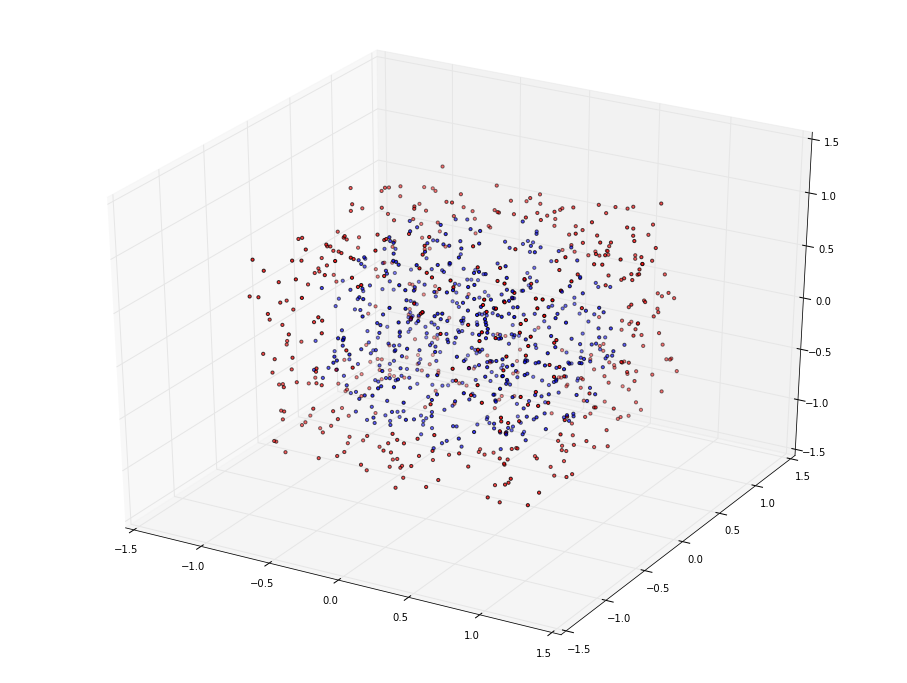

In [3]:
samples = 1000
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')
predictions = sess.run(y_4, { x: Xtrain, y: Ytrain})
X, Y, Z = Xtrain[:samples, 0], Xtrain[:samples, 1], Xtrain[:samples, 2]
color = ['r' if p[0] > p[1] else 'b' for p in predictions[:samples]]
ax.scatter(X, Y, Z, c=color, s=10)